In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
students = pd.read_csv('students.csv')
activity = pd.read_csv('course_activity.csv')
feedback = pd.read_csv('feedback.csv')


**Inspect the datasets fot structure**

In [3]:

print("Students Info:\n", students.info())
print("Course Activity Info:\n", activity.info())
print("Feedback Info:\n", feedback.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB
Students Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes

**Handle Missing Values**

In [4]:

print("Missing values in students:\n", students.isnull().sum())
print("Missing values in activity:\n", activity.isnull().sum())
print("Missing values in feedback:\n", feedback.isnull().sum())

Missing values in students:
 Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64
Missing values in activity:
 Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64
Missing values in feedback:
 Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64


**Remove Duplicate Rows**

In [70]:
students.drop_duplicates(inplace=True)
activity.drop_duplicates(inplace=True)
feedback.drop_duplicates(inplace=True)


In [9]:
# Group by Student ID, Course ID, and Date to combine duplicate entries
activity = activity.groupby(['Student_ID', 'Course_ID', 'Date'], as_index=False).agg({
    'Time_Spent_Minutes': 'sum',
    'Completion_Percentage': 'sum'
})

# Preview cleaned and aggregated course activity data
activity.head()


,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
0,S001,DM101,28/01/2024,155,88.87
1,S001,PY202,05/01/2024,90,46.10
2,S001,UX303,28/01/2024,177,54.93
3,S002,DM101,15/01/2024,49,66.47
4,S002,DM101,28/03/2024,39,71.35


In [10]:
# Inspect the datasets for structure
print("Students Info:\n", students.info())
print("Course Activity Info:\n", activity.info())
print("Feedback Info:\n", feedback.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Name            100 non-null    object
 2   Age             100 non-null    int64 
 3   Gender          100 non-null    object
 4   Location        100 non-null    object
 5   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.5+ KB
Students Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             654 non-null    object 
 1   Course_ID              654 non-null    object 
 2   Date                   654 non-null    object 
 3   Time_Spent_Minutes     654 non-null    int64  
 4   Completion_Percentage  654 non-null    float64
dtypes

In [11]:

students.drop(columns=['Name'], inplace=True)


In [12]:
print("Students Info:\n", students.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Student_ID      100 non-null    object
 1   Age             100 non-null    int64 
 2   Gender          100 non-null    object
 3   Location        100 non-null    object
 4   Enrolment_Date  100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.7+ KB
Students Info:
 None


**convert data types**

In [15]:
#  Convert Data Types
students['Enrolment_Date'] = pd.to_datetime(students['Enrolment_Date'], errors='coerce')
activity['Date'] = pd.to_datetime(activity['Date'], errors='coerce')

In [16]:
# Inspect the datasets for structure
print("Students Info:\n", students.info())
print("Course Activity Info:\n", activity.info())
print("Feedback Info:\n", feedback.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Age             100 non-null    int64         
 2   Gender          100 non-null    object        
 3   Location        100 non-null    object        
 4   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ KB
Students Info:
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             654 non-null    object        
 1   Course_ID              654 non-null    object        
 2   Date                   654 non-null    datetime64[ns]
 3   Time_Spent_Minutes     654 non-null    

In [17]:
# Convert numeric fields to appropriate types
activity['Time_Spent_Minutes'] = pd.to_numeric(activity['Time_Spent_Minutes'], errors='coerce')
activity['Time_Spent_Minutes'] = pd.to_numeric(activity['Completion_Percentage'], errors='coerce')
feedback['Rating'] = pd.to_numeric(feedback['Rating'], errors='coerce')


In [19]:
#  Final Check
print("\nCleaned datasets preview:")
print(students.head())
print(activity.head())
print(feedback.head())


Cleaned datasets preview:
  Student_ID  Age  Gender   Location Enrolment_Date
0       S001   24  Female    Kolkata     2023-11-24
1       S002   32   Other    Chennai     2023-02-27
2       S003   28   Other     Mumbai     2023-01-13
3       S004   25  Female  Bangalore     2023-05-21
4       S005   24   Other      Delhi     2023-06-05
  Student_ID Course_ID       Date  Time_Spent_Minutes  Completion_Percentage
0       S001     DM101 2024-01-28               88.87                  88.87
1       S001     PY202 2024-05-01               46.10                  46.10
2       S001     UX303 2024-01-28               54.93                  54.93
3       S002     DM101 2024-01-15               66.47                  66.47
4       S002     DM101 2024-03-28               71.35                  71.35
  Student_ID Course_ID  Rating       Feedback_Text
0       S057     UX303       2      Too fast-paced
1       S063     PY202       2  Loved the examples
2       S022     PY202       4     Could be be

**Overall average completion rate across courses**

In [23]:

overall_avg_completion = activity['Completion_Percentage'].mean()
print("Overall Average Completion Rate: {:.2f}%".format(overall_avg_completion))


Overall Average Completion Rate: 55.20%


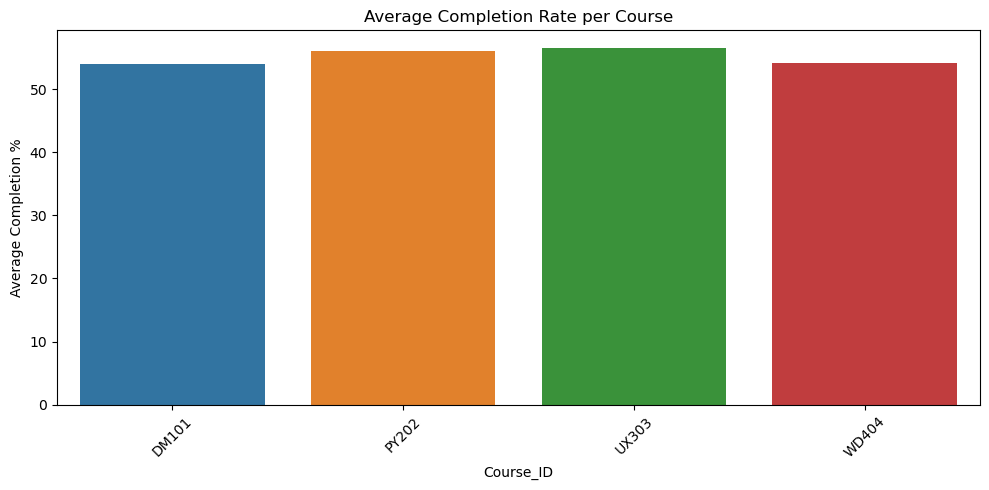

In [29]:
avg_completion = activity.groupby('Course_ID')['Completion_Percentage'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_completion.index, y=avg_completion.values)
plt.xticks(rotation=45)
plt.ylabel('Average Completion %')
plt.title('Average Completion Rate per Course')
plt.tight_layout()
plt.show()

**2. Course with the highest and lowest average engagement time**

In [30]:
 
avg_engagement = activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()

highest_engagement_course = avg_engagement.idxmax()
lowest_engagement_course = avg_engagement.idxmin()

print("Highest Average Engagement Course:", highest_engagement_course, "→", avg_engagement.max(), "mins")
print("Lowest Average Engagement Course:", lowest_engagement_course, "→", avg_engagement.min(), "mins")


Highest Average Engagement Course: UX303 → 56.49345238095238 mins
Lowest Average Engagement Course: DM101 → 53.9778064516129 mins


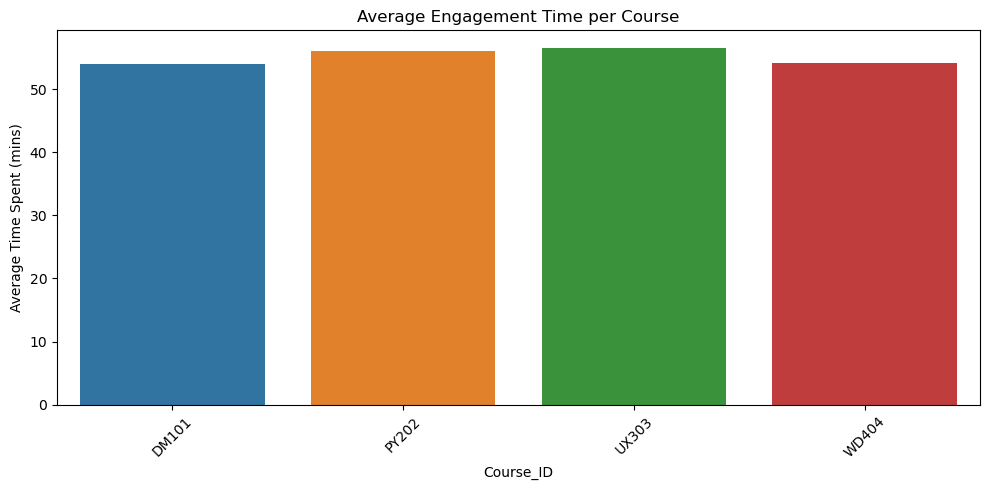

In [31]:
avg_engagement = activity.groupby('Course_ID')['Time_Spent_Minutes'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_engagement.index, y=avg_engagement.values)
plt.xticks(rotation=45)
plt.ylabel('Average Time Spent (mins)')
plt.title('Average Engagement Time per Course')
plt.tight_layout()
plt.show()


**3. Engagement by age group or location**

In [34]:
# Categorize age groups
students['Age Group'] = pd.cut(students['Age'], bins=[0, 18, 25, 35, 50],
                               labels=['<18', '18-25', '26-35', '36-50'])

# Merge with activity
merged = pd.merge(students, activity, left_on='Student_ID', right_on='Student_ID')

# Engagement by age group
engagement_by_age = merged.groupby('Age Group')['Time_Spent_Minutes'].mean()
print("Engagement by Age Group:\n", engagement_by_age)

# Engagement by location
engagement_by_location = merged.groupby('Location')['Time_Spent_Minutes'].mean()
print("Engagement by Location:\n", engagement_by_location)


Engagement by Age Group:
 Age Group
<18      52.912041
18-25    54.744452
26-35    55.943478
36-50          NaN
Name: Time_Spent_Minutes, dtype: float64
Engagement by Location:
 Location
Bangalore    54.042442
Chennai      53.923512
Delhi        56.104828
Kolkata      56.358462
Mumbai       57.847097
Name: Time_Spent_Minutes, dtype: float64


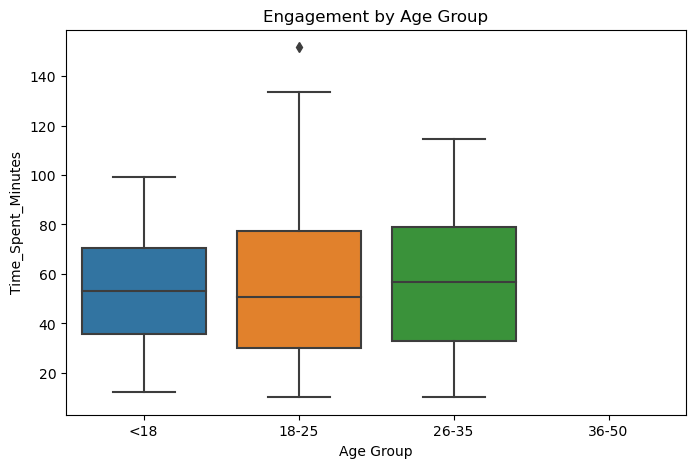

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Age Group', y='Time_Spent_Minutes', data=merged)
plt.title('Engagement by Age Group')
plt.show()


**4. Average feedback rating per course**

In [36]:

avg_feedback = feedback.groupby('Course_ID')['Rating '].mean()
print("Average Feedback per Course:\n", avg_feedback)


Average Feedback per Course:
 Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64


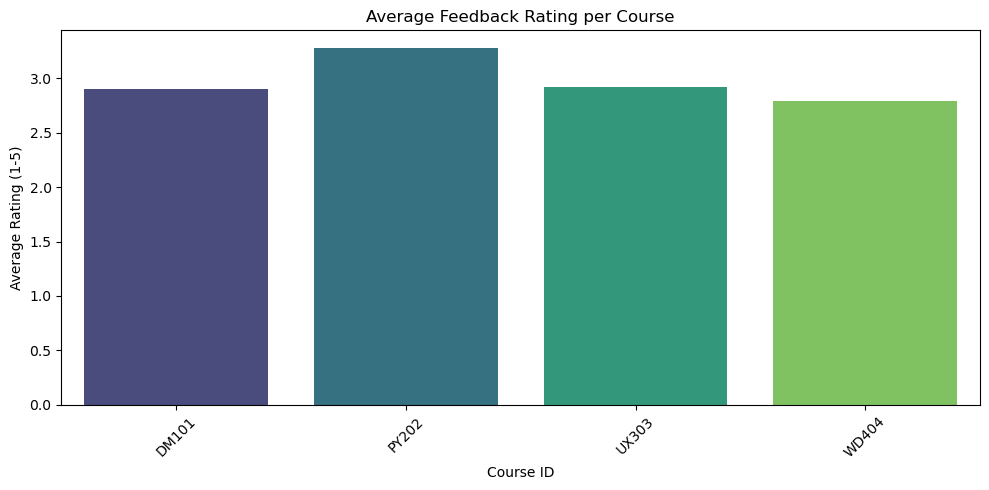

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_feedback.index, y=avg_feedback.values, palette="viridis")
plt.title('Average Feedback Rating per Course')
plt.ylabel('Average Rating (1-5)')
plt.xlabel('Course ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






**5. Is there a correlation between completion rate and feedback rating?**


In [53]:
merged_feedback = pd.merge(activity, feedback, on=['Student_ID', 'Course_ID'])

# Calculate correlation between Completion % and Rating
correlation_matrix = merged_feedback[['Completion_Percentage', 'Rating']].corr()
print("Correlation between Completion % and Feedback Rating:\n", correlation_matrix)


Correlation between Completion % and Feedback Rating:
                        Completion_Percentage    Rating
Completion_Percentage               1.000000 -0.027039
Rating                             -0.027039  1.000000


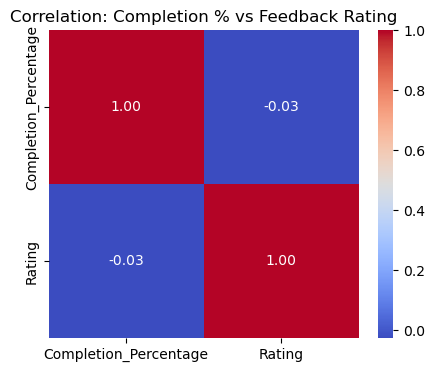

In [55]:
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Completion % vs Feedback Rating')
plt.show()


**6.Identify top 3 student segments based on engagement and satisfaction.**

In [58]:

#  Merge activity and feedback on Student ID & Course ID
merged_feedback = pd.merge(activity, feedback, on=['Student_ID', 'Course_ID'])

#  Group by Student ID and calculate average engagement and satisfaction
student_scores = merged_feedback.groupby('Student_ID')[['Time_Spent_Minutes', 'Rating']].mean()

#  Sort by both metrics (engagement and rating) in descending order
top_segments = student_scores.sort_values(by=['Time_Spent_Minutes', 'Rating'], ascending=False).head(3)

# Display the top 3 students based on both metrics
print("Top 3 Student Segments (based on engagement and satisfaction):\n")
print(top_segments)


Top 3 Student Segments (based on engagement and satisfaction):

            Time_Spent_Minutes  Rating
Student_ID                            
S052                    100.00     5.0
S059                     99.83     1.0
S063                     92.21     2.0


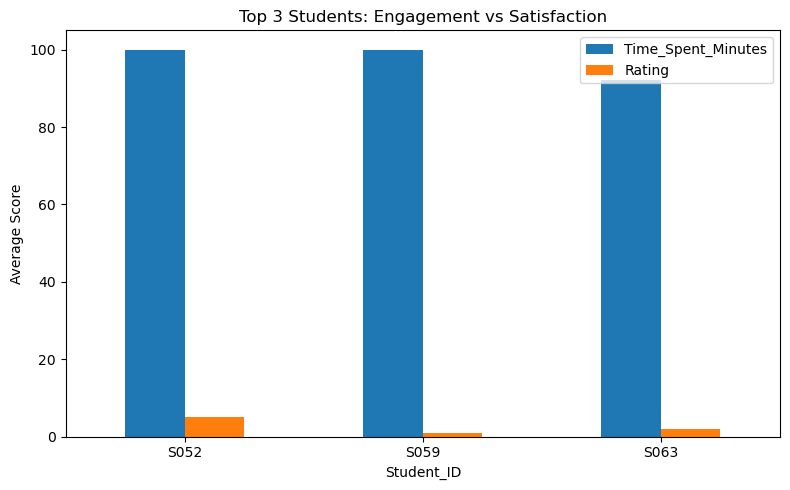

In [59]:
top_segments.plot(kind='bar', figsize=(8, 5), title="Top 3 Students: Engagement vs Satisfaction")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#   Visualizations


**Show engagement patterns by course and demographic**

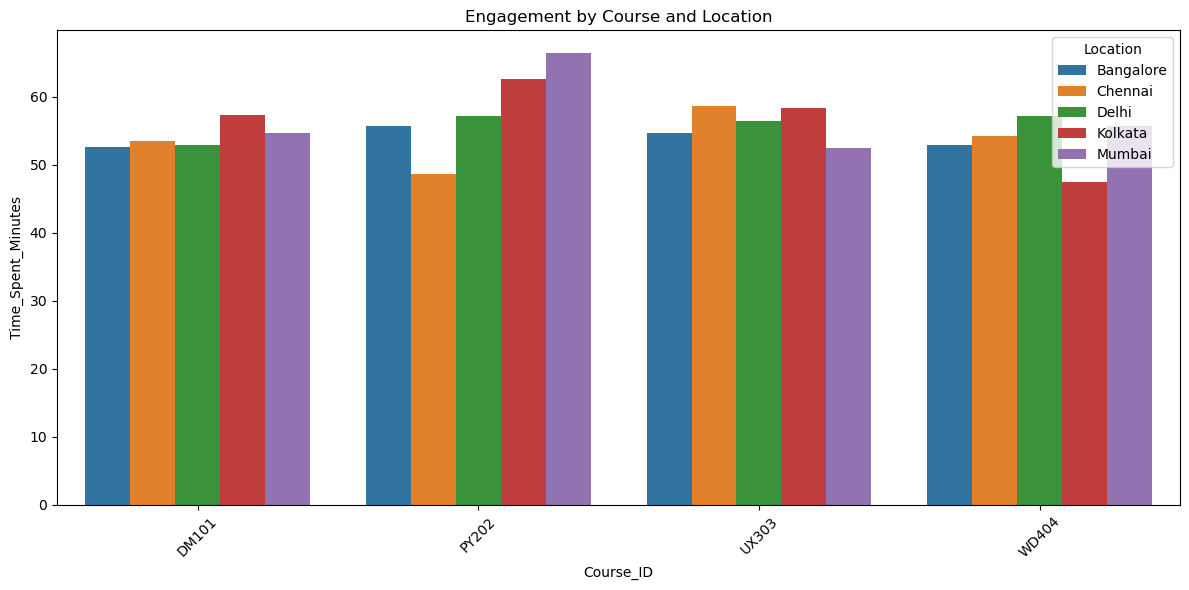

In [62]:
grouped_loc = merged.groupby(['Course_ID', 'Location'])['Time_Spent_Minutes'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Course_ID', y='Time_Spent_Minutes', hue='Location', data=grouped_loc)
plt.title('Engagement by Course and Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Average Feedback Rating per Course**

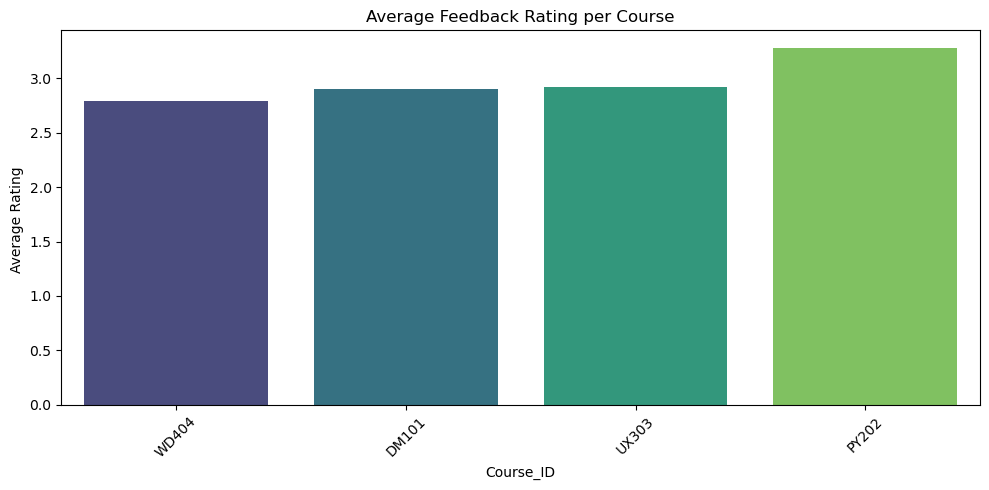

In [63]:
 
avg_rating = feedback.groupby('Course_ID')['Rating'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='viridis')
plt.title('Average Feedback Rating per Course')
plt.ylabel('Average Rating ')
plt.xlabel('Course_ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


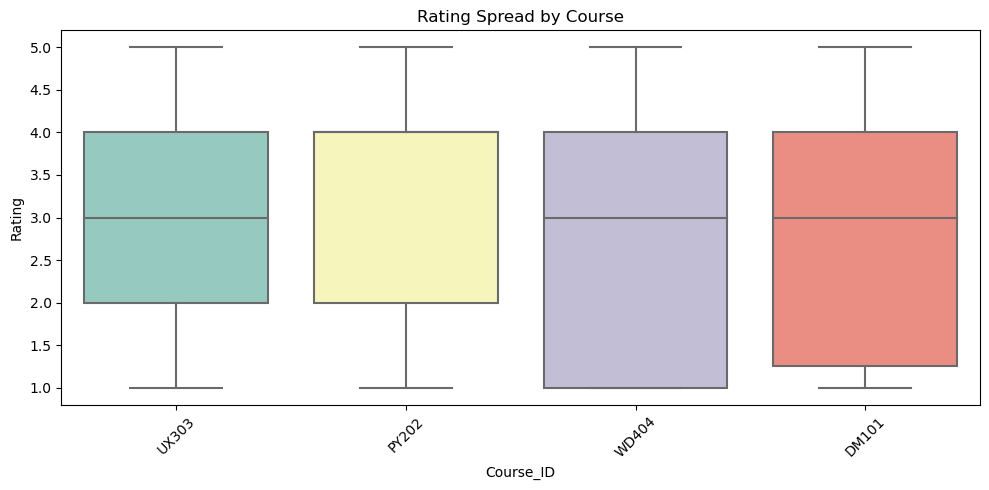

In [64]:
# Feedback Ratings by Course


plt.figure(figsize=(10, 5))
sns.boxplot(x='Course_ID', y='Rating', data=feedback, palette='Set3')
plt.title('Rating Spread by Course')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Feedback Rating by Age Group**


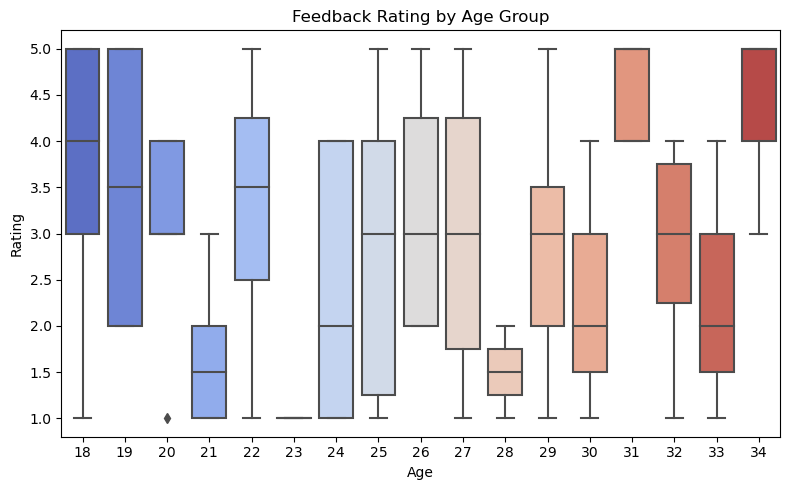

In [66]:
# 
merged_feedback_demo = pd.merge(students, feedback, left_on='Student_ID', right_on='Student_ID')
merged_feedback_demo['Age '] = pd.cut(merged_feedback_demo['Age'], bins=[0, 18, 25, 35, 50, 100],
                                           labels=['<18', '18-25', '26-35', '36-50', '50+'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Age', y='Ratin', data=merged_feedback_demo, palette='coolwarm')
plt.title('Feedback Rating by Age Group')
plt.tight_layout()
plt.show()


**Daily Engagement Over Time**


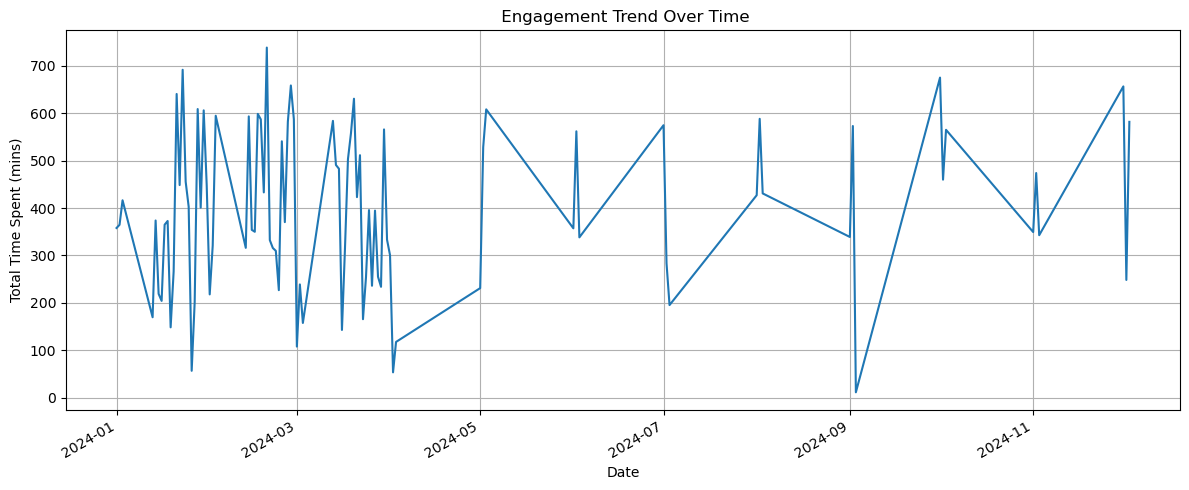

In [67]:

# Group by date to get total engagement per day
daily_engagement = activity.groupby('Date')['Time_Spent_Minutes'].sum()

plt.figure(figsize=(12, 5))
daily_engagement.plot()
plt.title(' Engagement Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Time Spent (mins)')
plt.grid(True)
plt.tight_layout()
plt.show()
